<a href="https://colab.research.google.com/github/bcollister01/course-nlp/blob/master/Ben_review_cv_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review: computer vision transfer learning

This is a subset of lesson 1 of https://course.fast.ai

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%.

In [3]:
path = untar_data(URLs.PETS)
path_anno = path/'annotations'
path_img = path/'images' #We just want the image files, not the annotations
np.random.seed(2)
fnames = get_image_files(path_img)
fnames[0]

PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_72.jpg')

To get this bit working correctly, had to edit line 540 of usr/local/lib/python3.7/dist-packages/fastai/vision/image.py

Replaced F.interpolate(x[None], scale_factor=1/d, mode='area') by F.interpolate(x[None], scale_factor=1/d, mode='area', recompute_scale_factor=True)

First thing we need to do to build supervised learning model is get labels for our observations/images - these are in the file names.

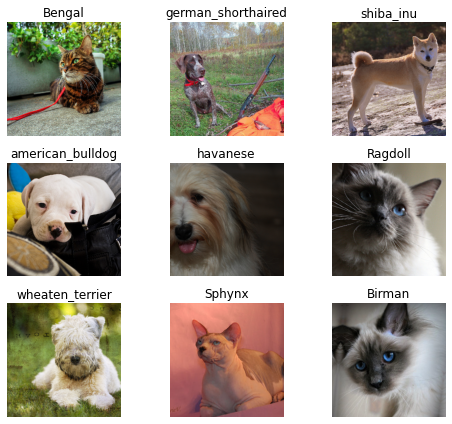

In [4]:
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

## Training

In [6]:
#Data + Model in fastai called a learner
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Model will train based on some variation of stochastic gradient descent. Fastai uses variant called ADAM.

In [7]:
#This is only training on the last layer.
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.364718,0.339414,0.106225,01:24
1,0.627716,0.329476,0.103518,01:24
2,0.375193,0.273358,0.086604,01:24
3,0.267607,0.260678,0.087280,01:24


In [8]:
learn.save('stage-1')

In [9]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.241929,0.252367,0.081191,01:27
1,0.210328,0.245607,0.079161,01:27


Here, we get accuracy of about 93%!

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 11),
 ('Ragdoll', 'Birman', 7),
 ('Russian_Blue', 'British_Shorthair', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Birman', 'Ragdoll', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('boxer', 'american_bulldog', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('miniature_pinscher', 'american_pit_bull_terrier', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Bengal', 'Maine_Coon', 2),
 ('Egyptian_Mau', 'Maine_Coon', 2),
 ('Persian', 'British_Shorthair', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('chihuahua', 'Sphynx', 2),
 ('chihuahua', 'american_pit_bull_terrier', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('havanese', 'yorkshire_terrier', 2)]